In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(r"C:\Users\ayush gautam\Downloads\ODI_Match_Data.csv\ODI_Match_Data.csv")
df.head()


C:\Users\ayush gautam\AppData\Local\Temp\ipykernel_38820\247087695.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ayush gautam\Downloads\ODI_Match_Data.csv\ODI_Match_Data.csv")


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389


In [5]:
df.shape

(1265103, 23)

In [6]:
df.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
cricsheet_id                int64
dtype: object

In [19]:
countNum=0
countObj=0
for cols in df.dtypes:
    if(cols=='int64'or cols=='float64'):
        countNum+=1
    if(cols==object):
        countObj+=1
print(countNum)
print(countObj)

10
9


# DATA CLEANING

In [20]:
# Check missing values
df.isnull().sum()


match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides               1236099
noballs             1260030
byes                1263126
legbyes             1252185
penalty             1265070
wicket_type               0
player_dismissed    1230614
dtype: int64

In [12]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)


In [13]:
df["start_date"] = pd.to_datetime(df["start_date"], errors="coerce")


In [14]:
# Convert all team names to uppercase for consistency
df["batting_team"] = df["batting_team"].str.strip().str.upper()
df["bowling_team"] = df["bowling_team"].str.strip().str.upper()


In [15]:
# Convert numerical columns if needed
df["runs_off_bat"] = pd.to_numeric(df["runs_off_bat"], errors="coerce")
df["extras"] = pd.to_numeric(df["extras"], errors="coerce")
df["ball"] = pd.to_numeric(df["ball"], errors="coerce")


In [23]:
df["total_runs"] = df["runs_off_bat"] + df["extras"]


In [18]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1265088 entries, 0 to 1265102
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   match_id          1265088 non-null  int64         
 1   season            1265088 non-null  object        
 2   start_date        1265088 non-null  datetime64[ns]
 3   venue             1265088 non-null  object        
 4   innings           1265088 non-null  int64         
 5   ball              1265088 non-null  float64       
 6   batting_team      1265088 non-null  object        
 7   bowling_team      1265088 non-null  object        
 8   striker           1265088 non-null  object        
 9   non_striker       1265088 non-null  object        
 10  bowler            1265088 non-null  object        
 11  runs_off_bat      1265088 non-null  int64         
 12  extras            1265088 non-null  int64         
 13  wides             28989 non-null    float64    

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,INDIA,AUSTRALIA,RD Gaikwad,Shubman Gill,SH Johnson,4,0,NaN,NaN,NaN,NaN,NaN,Not Out,NaN
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,INDIA,AUSTRALIA,RD Gaikwad,Shubman Gill,SH Johnson,0,0,NaN,NaN,NaN,NaN,NaN,Not Out,NaN
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,INDIA,AUSTRALIA,RD Gaikwad,Shubman Gill,SH Johnson,4,0,NaN,NaN,NaN,NaN,NaN,Not Out,NaN
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,INDIA,AUSTRALIA,RD Gaikwad,Shubman Gill,SH Johnson,0,0,NaN,NaN,NaN,NaN,NaN,Not Out,NaN
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,INDIA,AUSTRALIA,RD Gaikwad,Shubman Gill,SH Johnson,0,0,NaN,NaN,NaN,NaN,NaN,Not Out,NaN


In [16]:
df.drop(columns=["cricsheet_id"], inplace=True)


# UNIVARIATE ANALYSIS

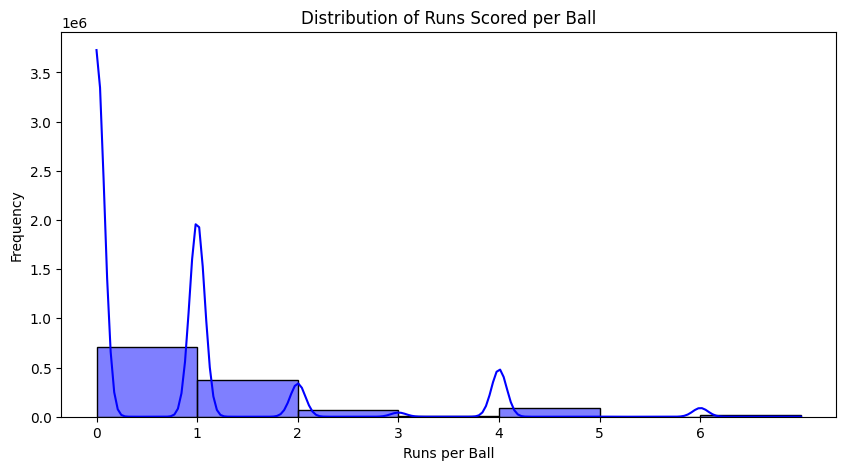

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df["runs_off_bat"], bins=7, kde=True, color="blue")
plt.title("Distribution of Runs Scored per Ball")
plt.xlabel("Runs per Ball")
plt.ylabel("Frequency")
plt.xticks(range(7))
plt.show()


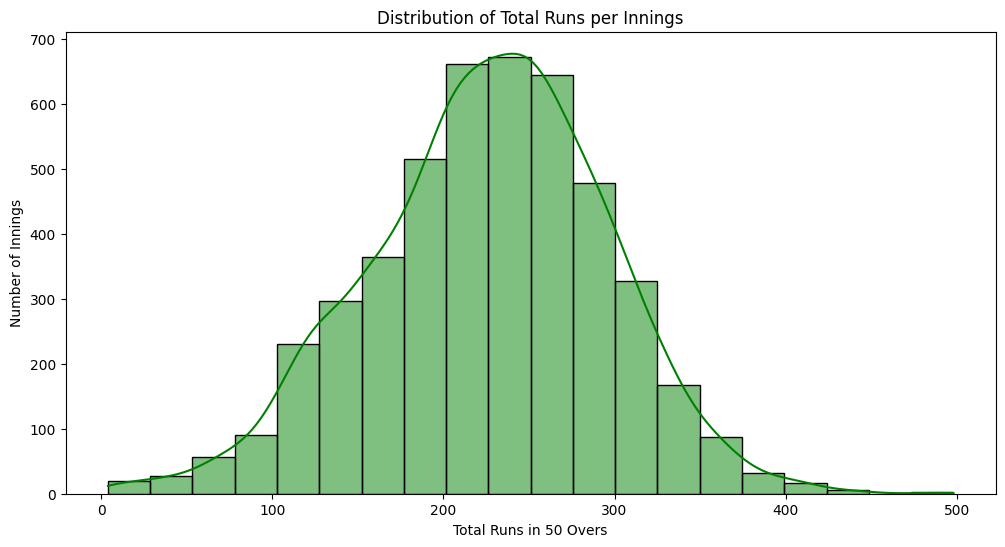

In [24]:
innings_runs = df.groupby(["match_id", "batting_team"])["total_runs"].sum()

plt.figure(figsize=(12, 6))
sns.histplot(innings_runs, bins=20, kde=True, color="green")
plt.title("Distribution of Total Runs per Innings")
plt.xlabel("Total Runs in 50 Overs")
plt.ylabel("Number of Innings")
plt.show()


conclusion: majority of teams scores in range of 250-270

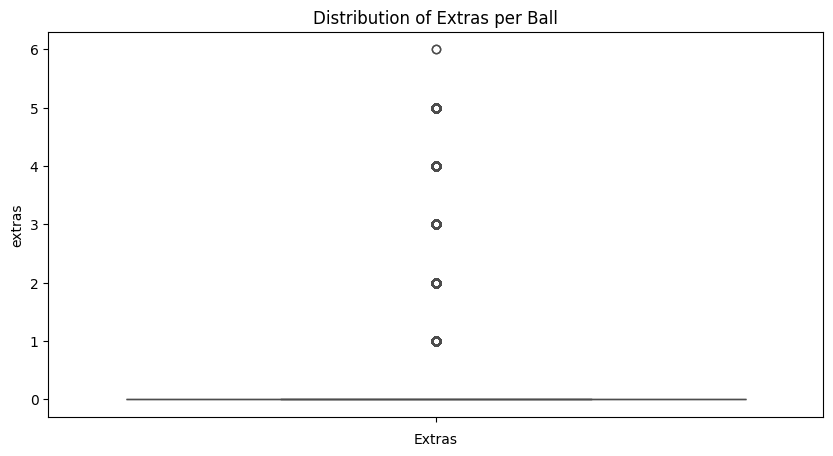

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["extras"], color="orange")
plt.title("Distribution of Extras per Ball")
plt.xlabel("Extras")
plt.show()


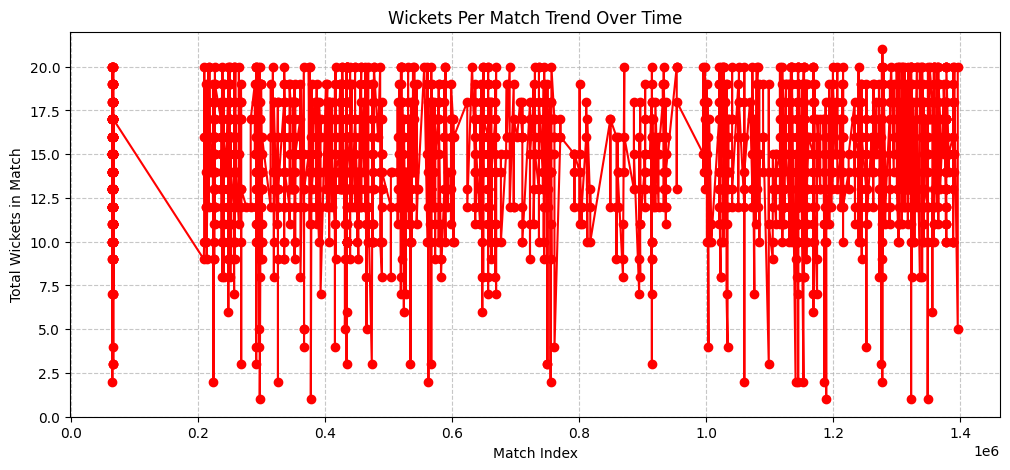

In [53]:
wickets_per_match = df_wickets.groupby("match_id")["player_dismissed"].count()

# Line Plot
plt.figure(figsize=(12, 5))
plt.plot(wickets_per_match.index, wickets_per_match.values, marker="o", linestyle="-", color="red")
plt.xlabel("Match Index")
plt.ylabel("Total Wickets in Match")
plt.title("Wickets Per Match Trend Over Time")
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


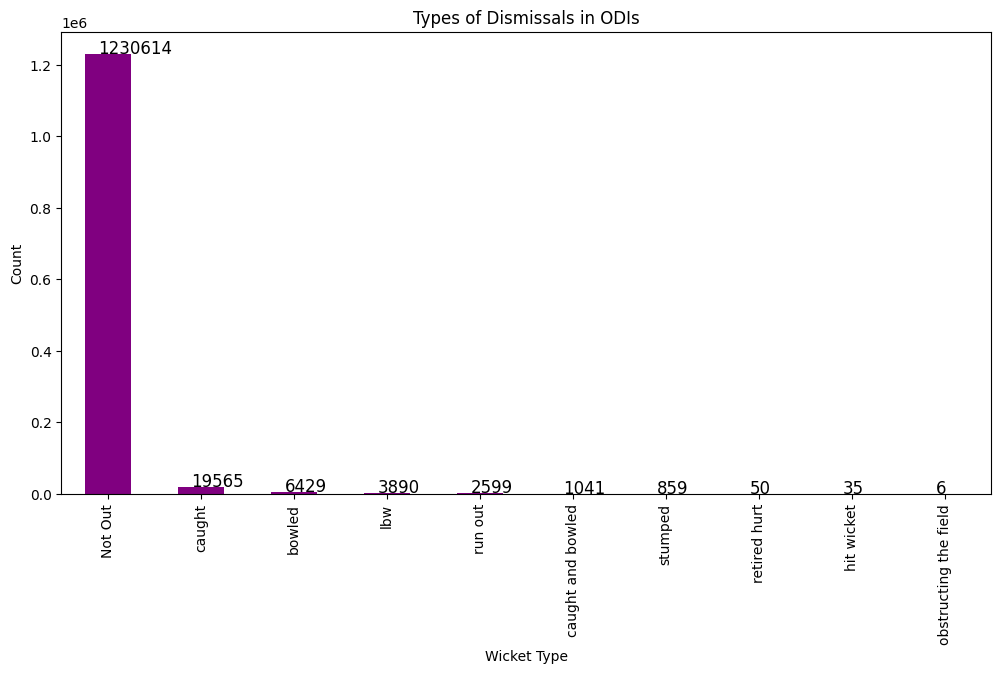

In [28]:
plt.figure(figsize=(12, 6))
ax = df["wicket_type"].value_counts().plot(kind="bar", color="purple")

# Add count on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + 0.15, p.get_height() + 5), fontsize=12)

plt.title("Types of Dismissals in ODIs")
plt.xlabel("Wicket Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


most common dismissal is caught out 

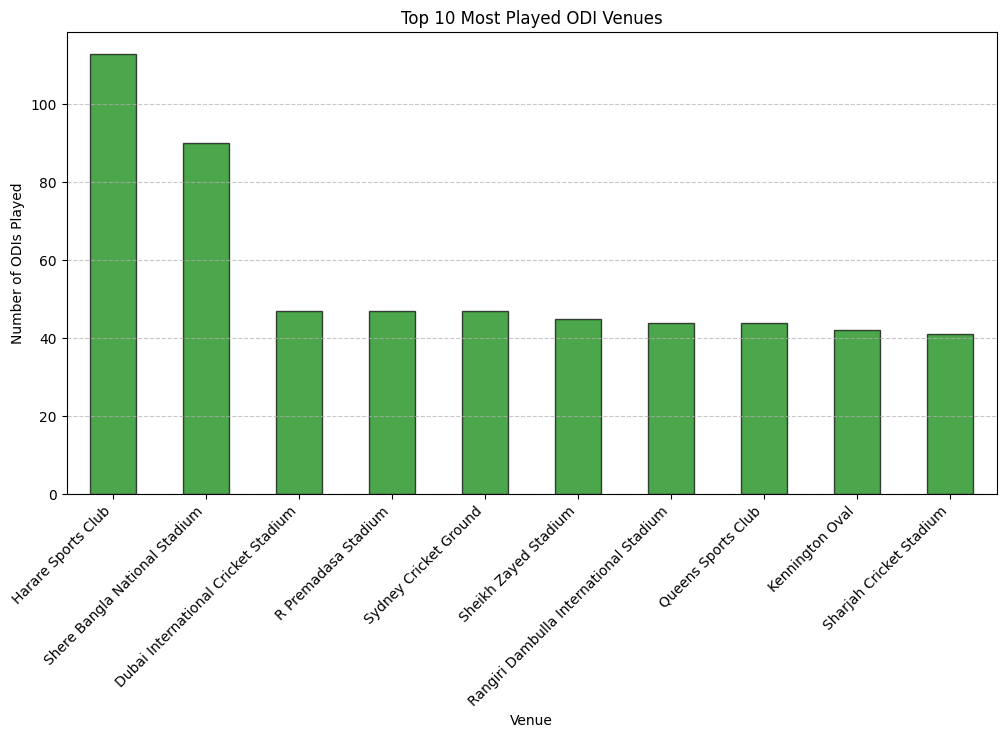

In [55]:
venue_match_count = df.groupby("venue")["match_id"].nunique().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
venue_match_count.plot(kind="bar", color="green", edgecolor="black", alpha=0.7)

# Formatting
plt.xlabel("Venue")
plt.ylabel("Number of ODIs Played")
plt.title("Top 10 Most Played ODI Venues")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


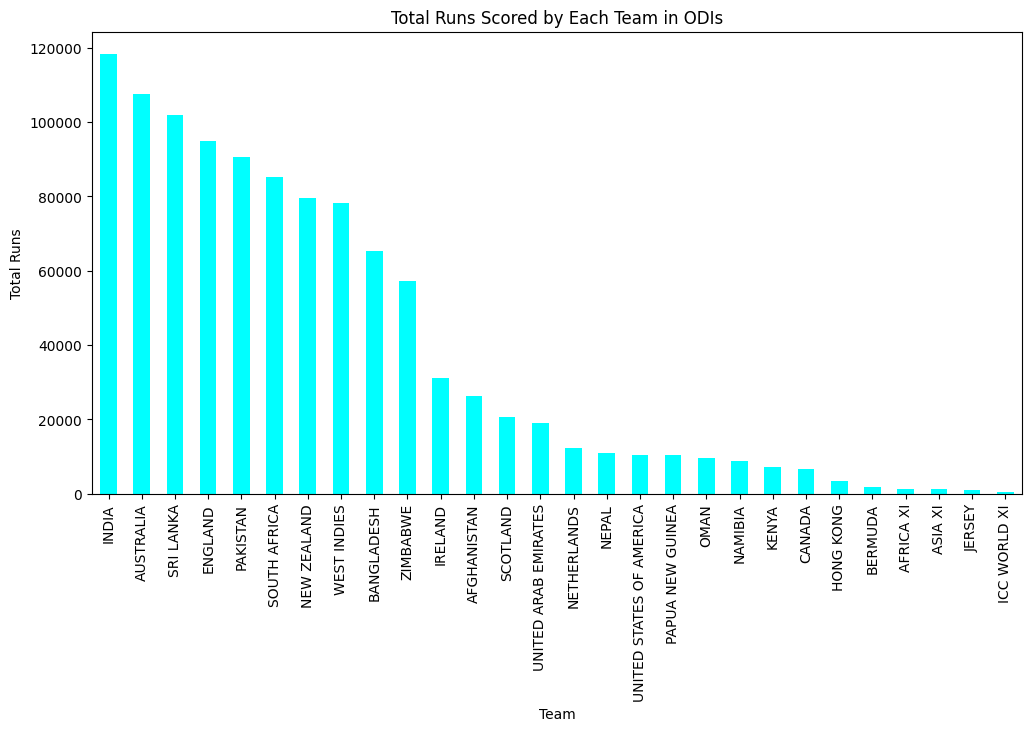

In [32]:
plt.figure(figsize=(12, 6))
df.groupby("batting_team")["total_runs"].sum().sort_values(ascending=False).plot(kind="bar", color="cyan")
plt.title("Total Runs Scored by Each Team in ODIs")
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.xticks(rotation=90)
plt.show()


# Categorical vs Categorical Analysis (Multivariate Analysis - Categorical Data)

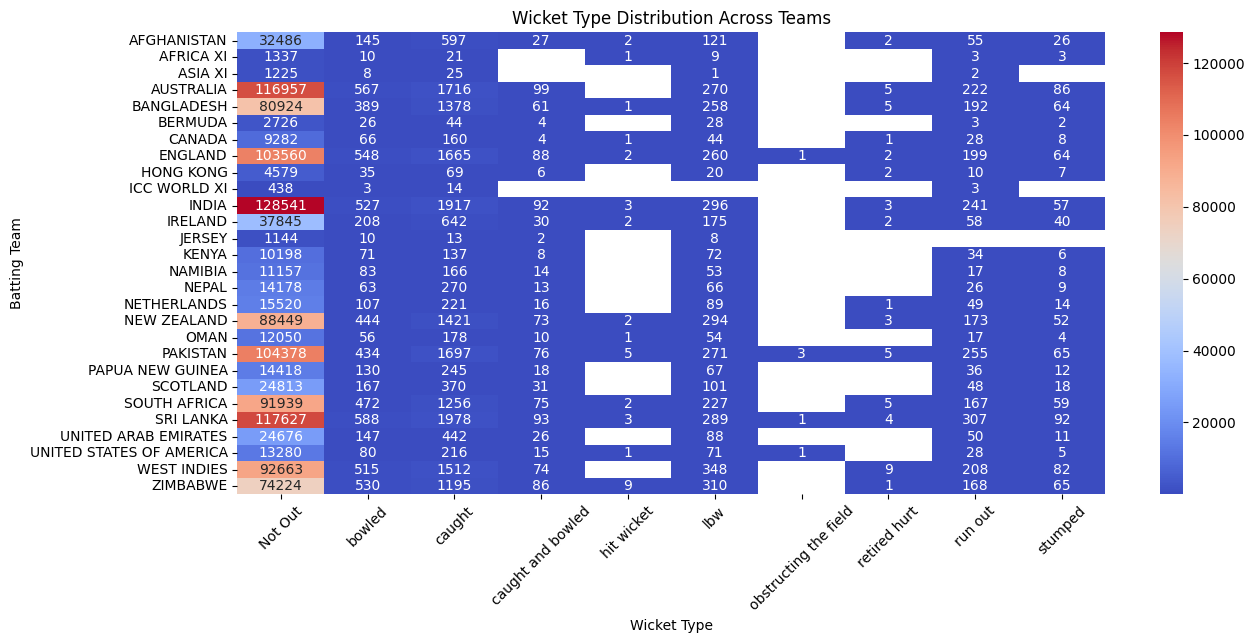

In [33]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.pivot_table(index="batting_team", columns="wicket_type", values="match_id", aggfunc="count"), cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Wicket Type Distribution Across Teams")
plt.xlabel("Wicket Type")
plt.ylabel("Batting Team")
plt.xticks(rotation=45)
plt.show()


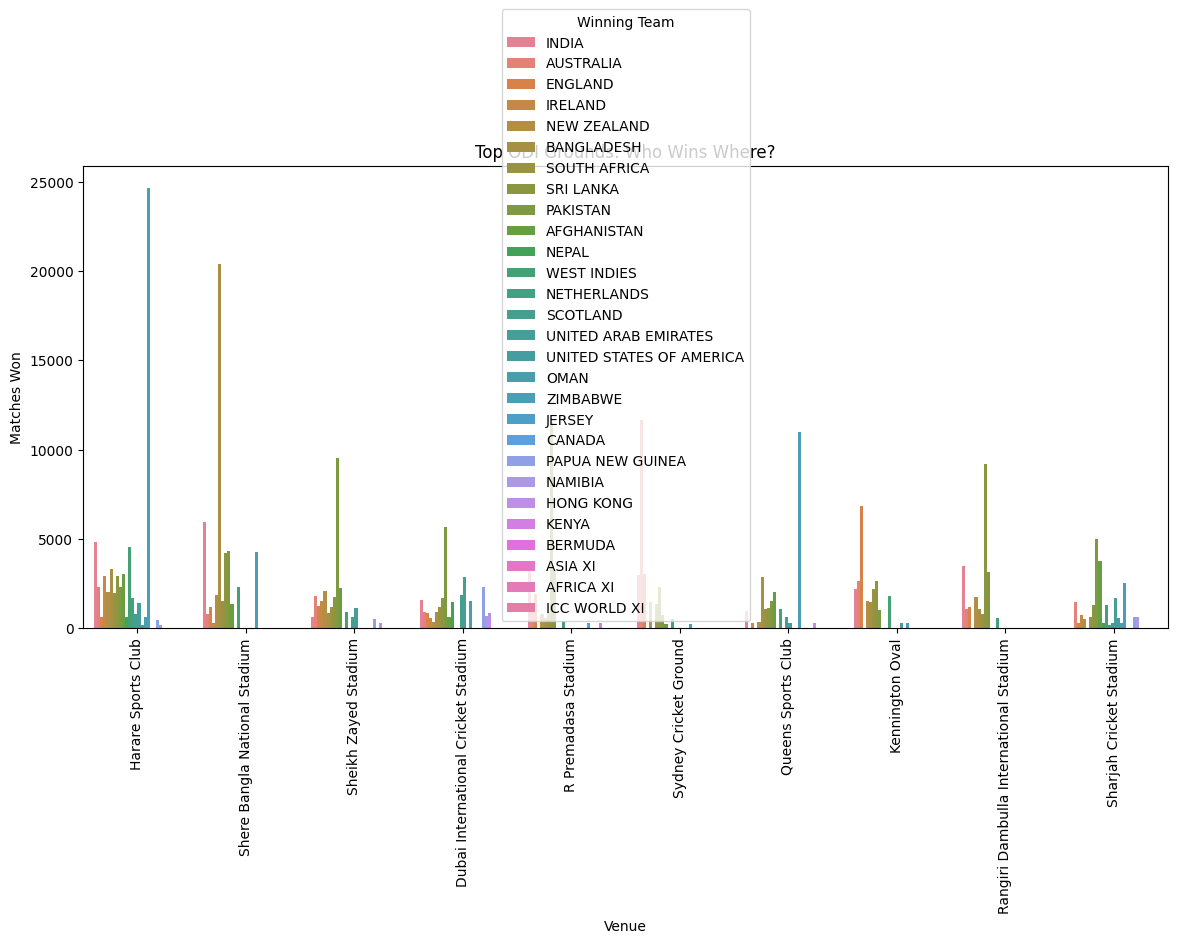

In [34]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="venue", hue="batting_team", order=df["venue"].value_counts().index[:10])
plt.title("Top ODI Grounds: Who Wins Where?")
plt.xlabel("Venue")
plt.ylabel("Matches Won")
plt.xticks(rotation=90)
plt.legend(title="Winning Team")
plt.show()


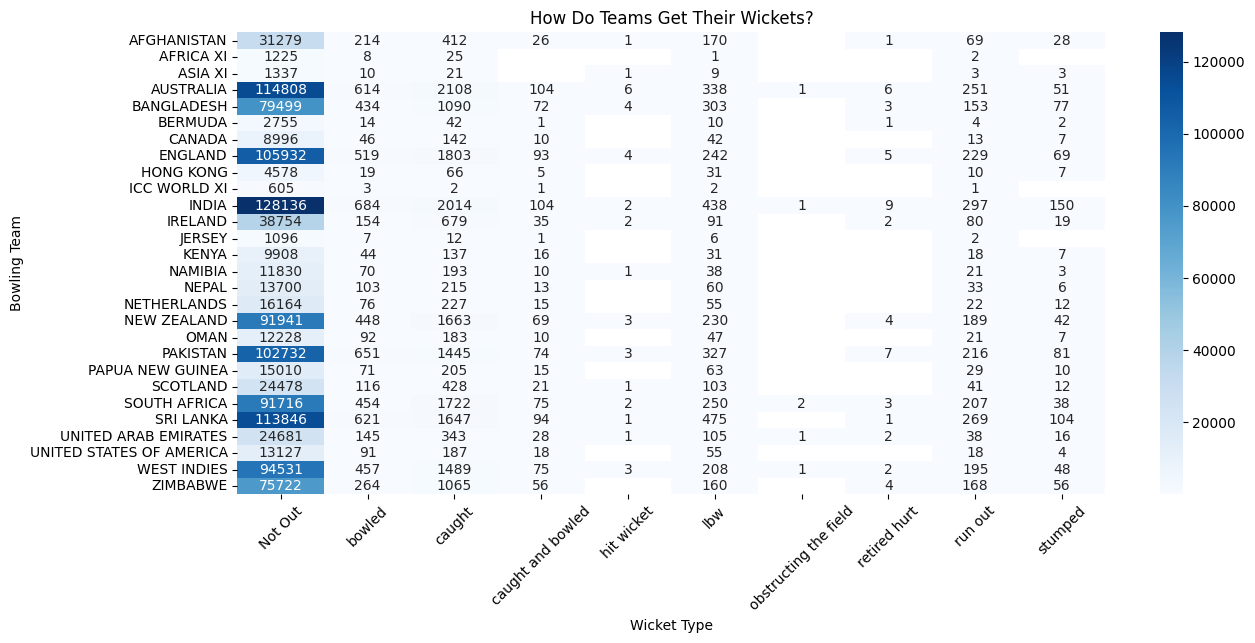

In [35]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.pivot_table(index="bowling_team", columns="wicket_type", values="match_id", aggfunc="count"), cmap="Blues", annot=True, fmt=".0f")
plt.title("How Do Teams Get Their Wickets?")
plt.xlabel("Wicket Type")
plt.ylabel("Bowling Team")
plt.xticks(rotation=45)
plt.show()


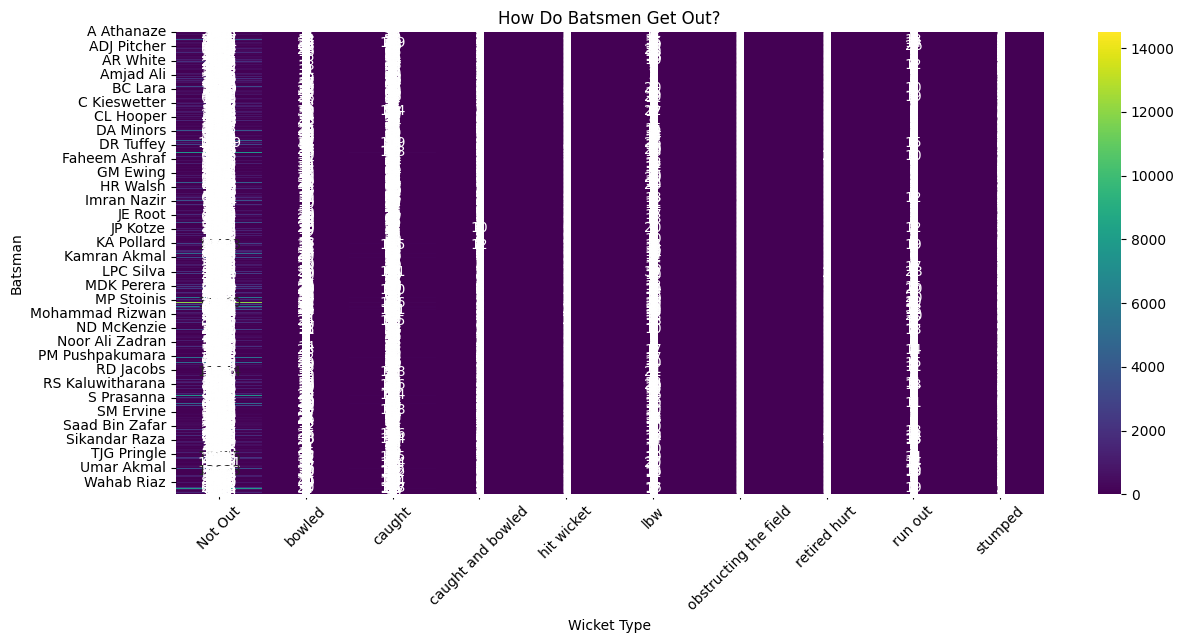

In [37]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.pivot_table(index="striker", columns="wicket_type", values="match_id", aggfunc="count").fillna(0), cmap="viridis", annot=True, fmt=".0f")
plt.title("How Do Batsmen Get Out?")
plt.xlabel("Wicket Type")
plt.ylabel("Batsman")
plt.xticks(rotation=45)
plt.show()


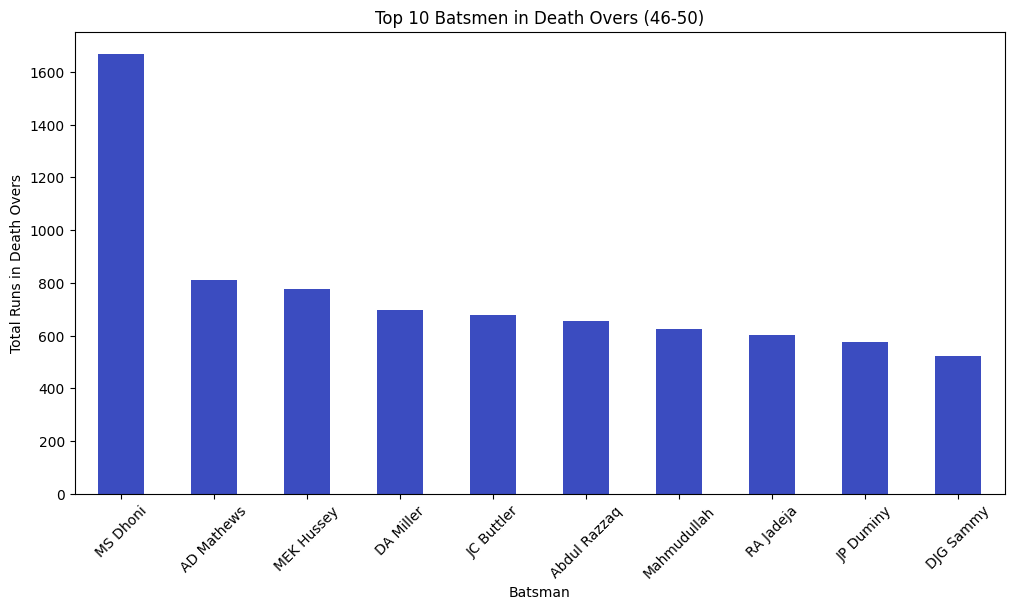

In [44]:
# Filter death overs (last 5 overs of an innings)
death_overs = df[(df["ball"] >= 46.0) & (df["ball"] <= 50.0)]

# Find total runs by batsman in death overs
death_overs_runs = death_overs.groupby("striker")["runs_off_bat"].sum().sort_values(ascending=False).head(10)

# Plot top batsmen in death overs
plt.figure(figsize=(12, 6))
death_overs_runs.plot(kind="bar", colormap="coolwarm")
plt.title("Top 10 Batsmen in Death Overs (46-50)")
plt.xlabel("Batsman")
plt.ylabel("Total Runs in Death Overs")
plt.xticks(rotation=45)
plt.show()


C:\Users\ayush gautam\AppData\Local\Temp\ipykernel_38820\2229306111.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bowler_wickets = df[df["wicket_type"].notna()].groupby(["phase", "bowler"])["wicket_type"].count().reset_index()
C:\Users\ayush gautam\AppData\Local\Temp\ipykernel_38820\2229306111.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_bowlers = bowler_wickets.groupby("phase").apply(lambda x: x.nlargest(5, "wicket_type"))
C:\Users\ayush gautam\AppData\Local\Temp\ipykernel_38820\2229306111.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is dep

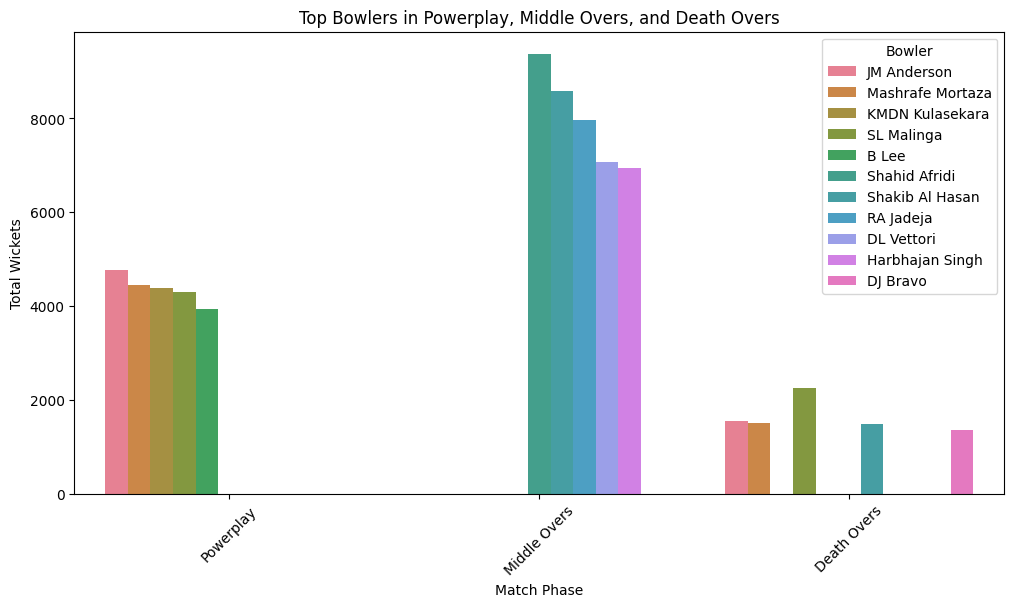

In [45]:
# Define phases
df["phase"] = pd.cut(df["ball"], bins=[0, 10, 40, 50], labels=["Powerplay", "Middle Overs", "Death Overs"])

# Count wickets per bowler in each phase
bowler_wickets = df[df["wicket_type"].notna()].groupby(["phase", "bowler"])["wicket_type"].count().reset_index()

# Get top bowlers per phase
top_bowlers = bowler_wickets.groupby("phase").apply(lambda x: x.nlargest(5, "wicket_type"))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_bowlers, x="phase", y="wicket_type", hue="bowler")
plt.title("Top Bowlers in Powerplay, Middle Overs, and Death Overs")
plt.ylabel("Total Wickets")
plt.xlabel("Match Phase")
plt.xticks(rotation=45)
plt.legend(title="Bowler")
plt.show()


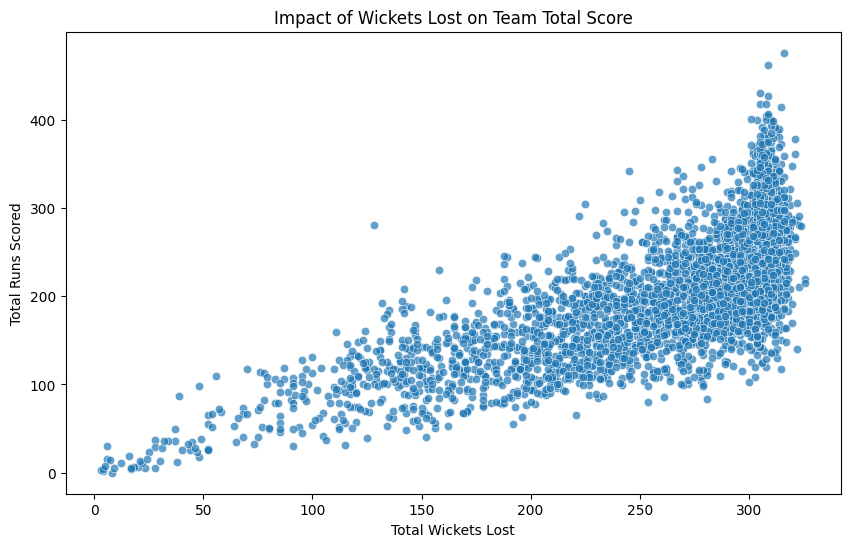

In [46]:
# Group by innings and count total runs & wickets
innings_runs_wickets = df.groupby(["match_id", "innings"]).agg({"runs_off_bat": "sum", "wicket_type": "count"}).reset_index()

# Scatter plot to check correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=innings_runs_wickets, x="wicket_type", y="runs_off_bat", alpha=0.7)
plt.title("Impact of Wickets Lost on Team Total Score")
plt.xlabel("Total Wickets Lost")
plt.ylabel("Total Runs Scored")
plt.show()


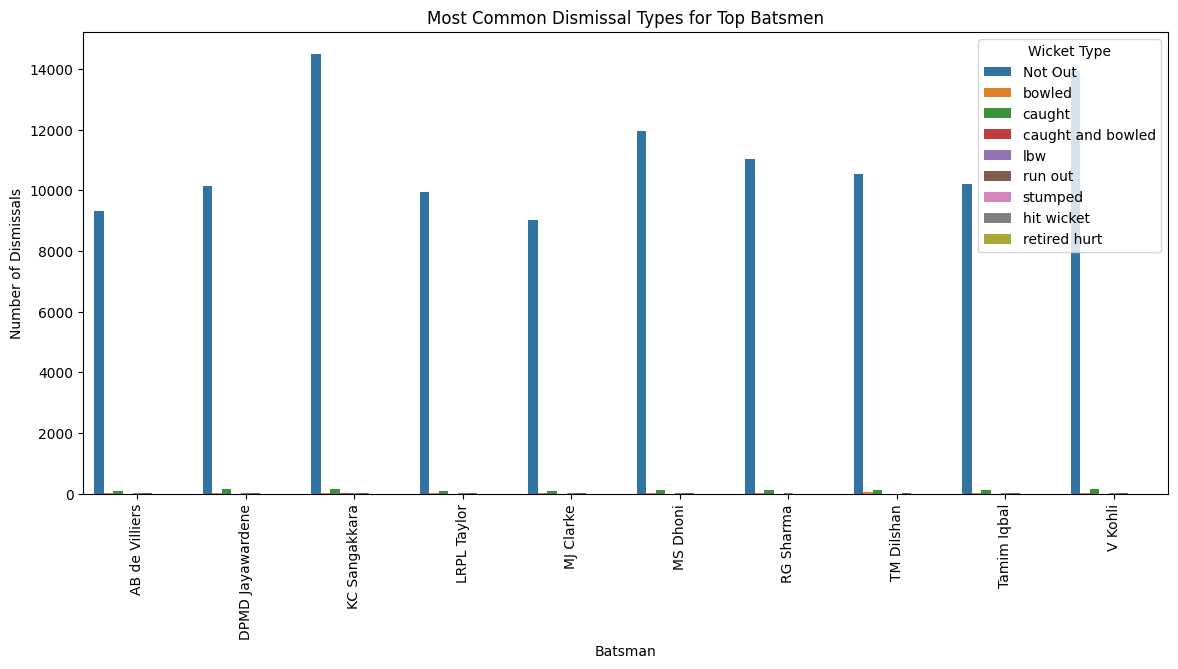

In [48]:
wicket_type_counts = df[df["wicket_type"].notna()].groupby(["striker", "wicket_type"]).size().reset_index(name="count")
top_batsmen = wicket_type_counts.groupby("striker")["count"].sum().nlargest(10).index
filtered_data = wicket_type_counts[wicket_type_counts["striker"].isin(top_batsmen)]


plt.figure(figsize=(14, 6))
sns.barplot(data=filtered_data, x="striker", y="count", hue="wicket_type")
plt.title("Most Common Dismissal Types for Top Batsmen")
plt.xlabel("Batsman")
plt.ylabel("Number of Dismissals")
plt.xticks(rotation=90)
plt.legend(title="Wicket Type")
plt.show()


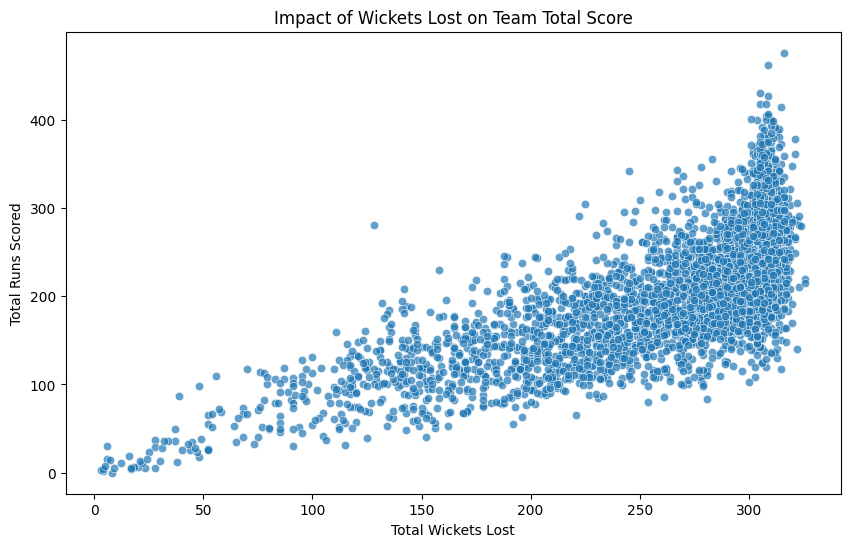

# Chi-Square Test: Does Wicket Type Depend on Batting Team?

H₀ (Null Hypothesis): Wicket type is independent of batting team.
H₁ (Alternative Hypothesis): Certain teams lose wickets in specific ways more often than expected

In [38]:
import scipy.stats as stats
import pandas as pd

# Create contingency table
wicket_team_ct = pd.crosstab(df["batting_team"], df["wicket_type"])

# Perform Chi-Square Test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(wicket_team_ct)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

# Conclusion
if p_val < 0.05:
    print("Reject H₀: There is a significant relationship between batting team and wicket type.")
else:
    print("Fail to reject H₀: No significant relationship found.")


Chi-Square Statistic: 1023.750388357289
P-Value: 2.50953635803651e-96
Reject H₀: There is a significant relationship between batting team and wicket type.


# Z-Test: Is Kohli’s Century Rate Significantly Higher than Others?

# Hypothesis:
H₀: Kohli's century rate is the same as other players.
H₁: Kohli scores centuries significantly more often.

In [43]:
from statsmodels.stats.proportion import proportions_ztest

# Check if the values are nonzero before performing the Z-test
if kohli_100s > 0 and other_100s > 0 and kohli_innings > 0 and other_innings > 0:
    # Perform Z-Test
    stat, p_val = proportions_ztest([kohli_100s, other_100s], [kohli_innings, other_innings])

    # Print results
    print(f"Z-Statistic: {stat:.2f}")
    print(f"P-Value: {p_val:.5f}")

    # Conclusion
    if p_val < 0.05:
        print("✅ Kohli has a significantly higher century rate than other players (Reject H₀).")
    else:
        print("❌ Kohli's century rate is not significantly different from others (Fail to reject H₀).")
else:
    print("Z-test cannot be performed due to insufficient data (zero centuries or innings).")


Z-Statistic: 13.70
P-Value: 0.00000
✅ Kohli has a significantly higher century rate than other players (Reject H₀).
